> ## 데이터 청년 캠퍼스 14일차 과제
> ### <b>노재혁</b>

### 1. 나이브베이즈(가우시안)를 이용
#### 와인 등급을 예측하는 모델을 만들고, 모델 성능을 평가하시오.
- prior 값을 변경하면서 성능비교
- datasets.load_wine() 으로 데이터를 불러와 사용 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree
import graphviz

In [2]:
# confusion matrix, accuracy, precision, recall
def cfmat_acc(y_test, predict):
    confusion = confusion_matrix(y_test, predict)
    accuracy = accuracy_score(y_test, predict)
    print(f'confusion matrix\n{confusion}\n')
    print(f'[정확도:{accuracy:.4f}]')

In [3]:
wine = datasets.load_wine()

wdf = pd.DataFrame(wine.data, columns=wine.feature_names)
wdf['target'] = pd.DataFrame(wine.target)
wdf.head()

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size=0.3,
                                                   random_state=121)

In [4]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cfmat_acc(y_test, y_pred)

confusion matrix
[[14  1  0]
 [ 0 20  1]
 [ 0  0 18]]

[정확도:0.9630]


In [82]:
clf2 = GaussianNB(priors = [1/100, 1/100, 98/100]) # 0, 1, 2가 될 확률; 0이나 1로 예측힘들때 2로 예측될 확률 높다
clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
cfmat_acc(y_test, y_pred2)

confusion matrix
[[14  1  0]
 [ 0 20  1]
 [ 0  0 18]]

[정확도:0.9630]


In [83]:
clf3 = GaussianNB(priors = [1/100, 98/100, 1/100]) # 0, 1, 2가 될 확률; 0이나 1로 예측힘들때 2로 예측될 확률 높다
clf3 = clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)
cfmat_acc(y_test, y_pred3)

confusion matrix
[[13  2  0]
 [ 0 21  0]
 [ 0  0 18]]

[정확도:0.9630]


In [84]:
clf4 = GaussianNB(priors = [98/100, 1/100, 1/100]) # 0, 1, 2가 될 확률; 0이나 1로 예측힘들때 2로 예측될 확률 높다
clf4.fit(x_train, y_train)
y_pred4 = clf4.predict(x_test)
cfmat_acc(y_test, y_pred4)

confusion matrix
[[14  1  0]
 [ 1 19  1]
 [ 0  0 18]]

[정확도:0.9444]


In [71]:
# 순열조합 알고리즘 필요
# def priors_change(model):
#     for i in range(2, 100, 2):
#         one = i
#         two = 100 - one
#         three = two/2
# clf = model(priors = [one/100, two/100, three/100])
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# acc = accuracy_score(y_test, y_pred)
# max_value = 0
# if acc > max_value:
#     max_value = acc
#     max_parameter = [one, two, three]

# print(max_value, max_parameter)

### 2. kNN을 이용
#### 와인 등급을 분류하는 모델을 만들고, 모델 성능을 평가하시오.

In [6]:
clf = KNeighborsClassifier(35)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cfmat_acc(y_test, y_pred)

confusion matrix
[[12  0  3]
 [ 3 15  3]
 [ 1  8  9]]

[정확도:0.6667]


In [7]:
test_acc = []

# 가장 정확도가 높은 k값과, 해당 정확도
for n in range(1, len(y_pred)):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    test_acc.append(accuracy_score(y_test, y_pred))
    
print(f"가장 높은 k값은 {test_acc.index(max(test_acc))+1}이고, 해당 정확도는 {max(test_acc)}입니다.")
# 인덱스보다 실제값은 +1이 되어있음

가장 높은 k값은 3이고, 해당 정확도는 0.6851851851851852입니다.


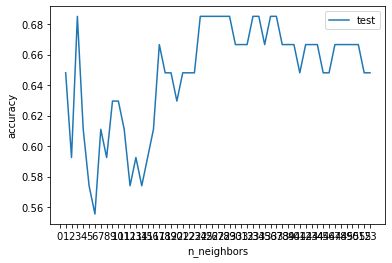

In [8]:
plt.figure()
plt.plot(range(1, len(y_pred)), test_acc, label='test')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, len(y_pred), step=1))
plt.legend()
plt.show()


In [9]:
test_acc2 = []

# 가장 정확도가 높은 k값과, 해당 정확도
for n in range(1, len(y_pred)):
    clf = KNeighborsClassifier(n_neighbors=n, weights='distance')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    test_acc2.append(accuracy_score(y_test, y_pred))
    
print(f"가장 높은 k값은 {test_acc2.index(max(test_acc2))+1}이고, 해당 정확도는 {max(test_acc2)}입니다.")
# 인덱스보다 실제값은 +1이 되어있음

가장 높은 k값은 33이고, 해당 정확도는 0.7222222222222222입니다.


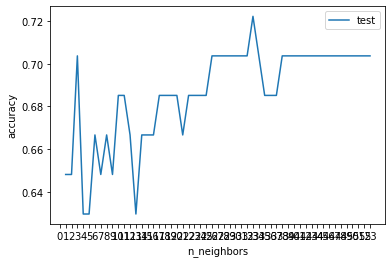

In [10]:
plt.figure()
plt.plot(range(1, len(y_pred2)), test_acc2, label='test')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, len(y_pred), step=1))
plt.legend()
plt.show()


### 3. svm 을 이용
#### 와인 등급을 분류하는 모델을 kenel을 이용해 만들고, 모델 성능을 평가하시오.

In [11]:
# linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cfmat_acc(y_test, y_pred)

confusion matrix
[[15  0  0]
 [ 3 17  1]
 [ 0  1 17]]

[정확도:0.9074]


In [12]:
# rbf(radial basis function)
clf = svm.SVC(kernel='rbf', gamma=0.2) 
# 감마값; 정규분포의 폭(클수록 분산 작아져서 종모양 얇아짐, 커질수록 멀리 분포된 데이터 무시, 
# 가까울수록 세부적인 것들에 대해 신경써준다. )
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cfmat_acc(y_test, y_pred)

confusion matrix
[[ 1 14  0]
 [ 0 21  0]
 [ 0 18  0]]

[정확도:0.4074]


In [13]:
# polynomial kernel(다차항 커널)
clf = svm.SVC(kernel='poly', degree=3) # n차항 설정
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cfmat_acc(y_test, y_pred)

confusion matrix
[[14  1  0]
 [ 3 18  0]
 [ 3 14  1]]

[정확도:0.6111]


In [14]:
# # 시각화(사이킷런 홈페이지 참조)
# def make_meshgrid(x, y, h=.02): # 배경
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     return xx, yy

# def plot_contours(ax, clf, xx, yy, **params):
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

In [15]:
# models = (svm.SVC(kernel='linear'),
#          svm.LinearSVC(),
#          svm.SVC(kernel='rbf', gamma=0.5),
#          svm.SVC(kernel='poly', degree=3))
# models = (clf.fit(x_train, y_train) for clf in models)

In [16]:
# titles = ('SVC with linear kernel',
#          'LinearSVC (linear kernel)',
#          'SVC with RBF kernel)',
#          'SVC with polynomial (degree 3) kernel')

In [17]:
# x_data = wine.data[:, :2]
# y_data = wine.target

In [18]:
# fig, sub = plt.subplots(2, 2)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

# X0, X1 = x_data[:, 0], x_data[:, 1]
# xx, yy = make_meshgrid(X0, X1)

# for clf, title, ax in zip(models, titles, sub.flatten()):
#     plot_contours(ax, clf, xx, yy,
#                  cmap=plt.cm.coolwarm, alpha=0.8)
#     ax.scatter(X0, X1, c=y_data, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel('wine X')
#     ax.set_ylabel('wine Y')
#     ax.set_xticks(())
#     ax.set_yticks(title)

# plt.show()

### 4. DT를 이용

#### 와인 등급을 분류하는 모델을 만들어 시각화한 후, 모델 성능을 평가하시오.

In [19]:
clf = tree.DecisionTreeClassifier()
clf_dt = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cfmat_acc(y_test, y_pred)

confusion matrix
[[13  2  0]
 [ 2 18  1]
 [ 0  1 17]]

[정확도:0.8889]


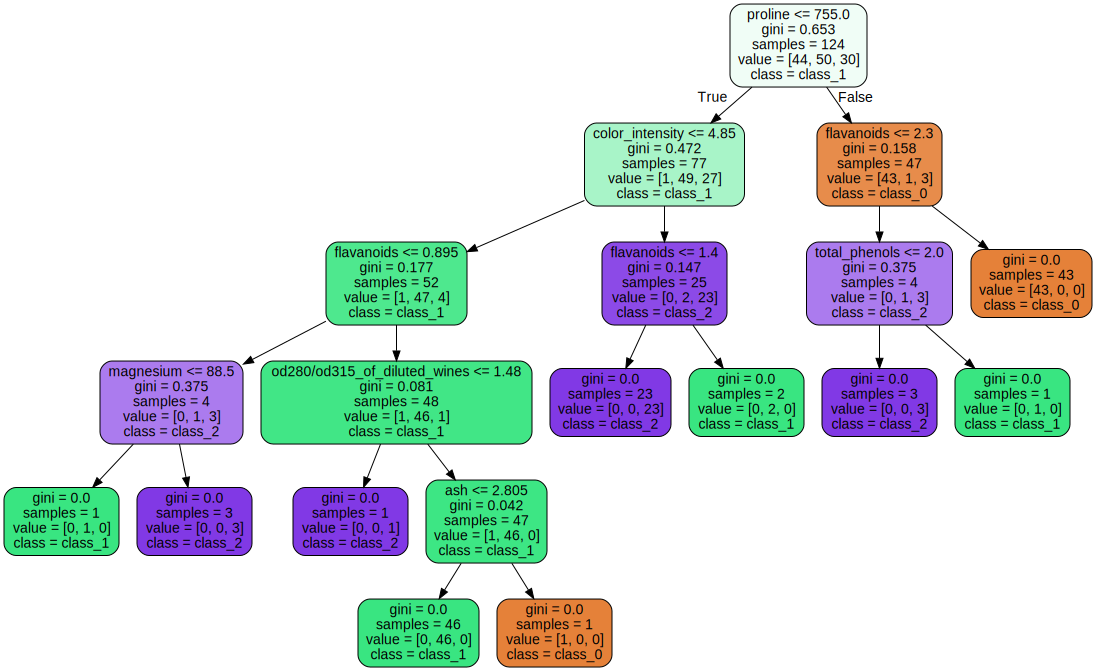

In [20]:
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                               feature_names=wine.feature_names,
                               class_names=wine.target_names,
                               filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph

In [21]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2_dt = clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)
cfmat_acc(y_test, y_pred2)

confusion matrix
[[13  2  0]
 [ 3 16  2]
 [ 0  1 17]]

[정확도:0.8519]


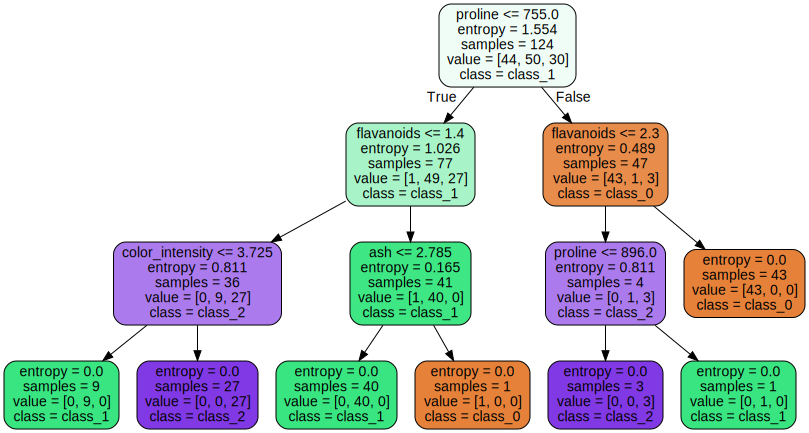

In [22]:
dot_data2 = tree.export_graphviz(clf2_dt, out_file=None,
                               feature_names=wine.feature_names,
                               class_names=wine.target_names,
                               filled=True, rounded=True)

graph2 = graphviz.Source(dot_data2)
graph2

In [23]:
clf3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf3_dt = clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)
cfmat_acc(y_test, y_pred3)

confusion matrix
[[13  1  1]
 [ 1 18  2]
 [ 0  1 17]]

[정확도:0.8889]


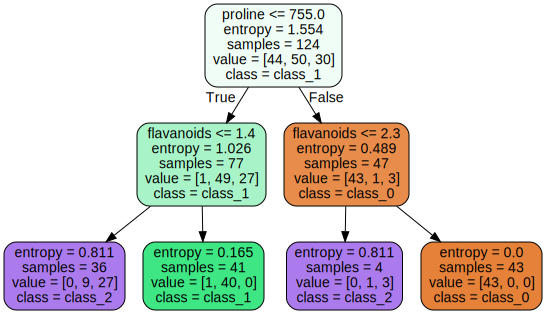

In [24]:
dot_data3 = tree.export_graphviz(clf3_dt, out_file=None,
                               feature_names=wine.feature_names,
                               class_names=wine.target_names,
                               filled=True, rounded=True)

graph3 = graphviz.Source(dot_data3)
graph3